We use a part of Alexandru Papiu's notebook

In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline


data_path='/home/barlesh/Projects/Data_Mining_Project/data/'
train_file='train.csv'
test_file='test.csv'
train_file_new='train_new.csv'
test_file_new='test_new.csv'
result_path='results/'
result_file='res.csv'

In [30]:
train = pd.read_csv(data_path+train_file_new)
test = pd.read_csv(data_path+test_file_new)

In [31]:
train.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [32]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

## Data preprocessing: ##

We're not going to do anything fancy here:
First I'll transform the skewed numeric features by taking log(feature + 1) - this will make the features more normal
Create Dummy variables for the categorical features
Replace the numeric missing values (NaN's) with the mean of their respective columns
In [5]:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0b1eb08d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa0b1e71b38>]], dtype=object)

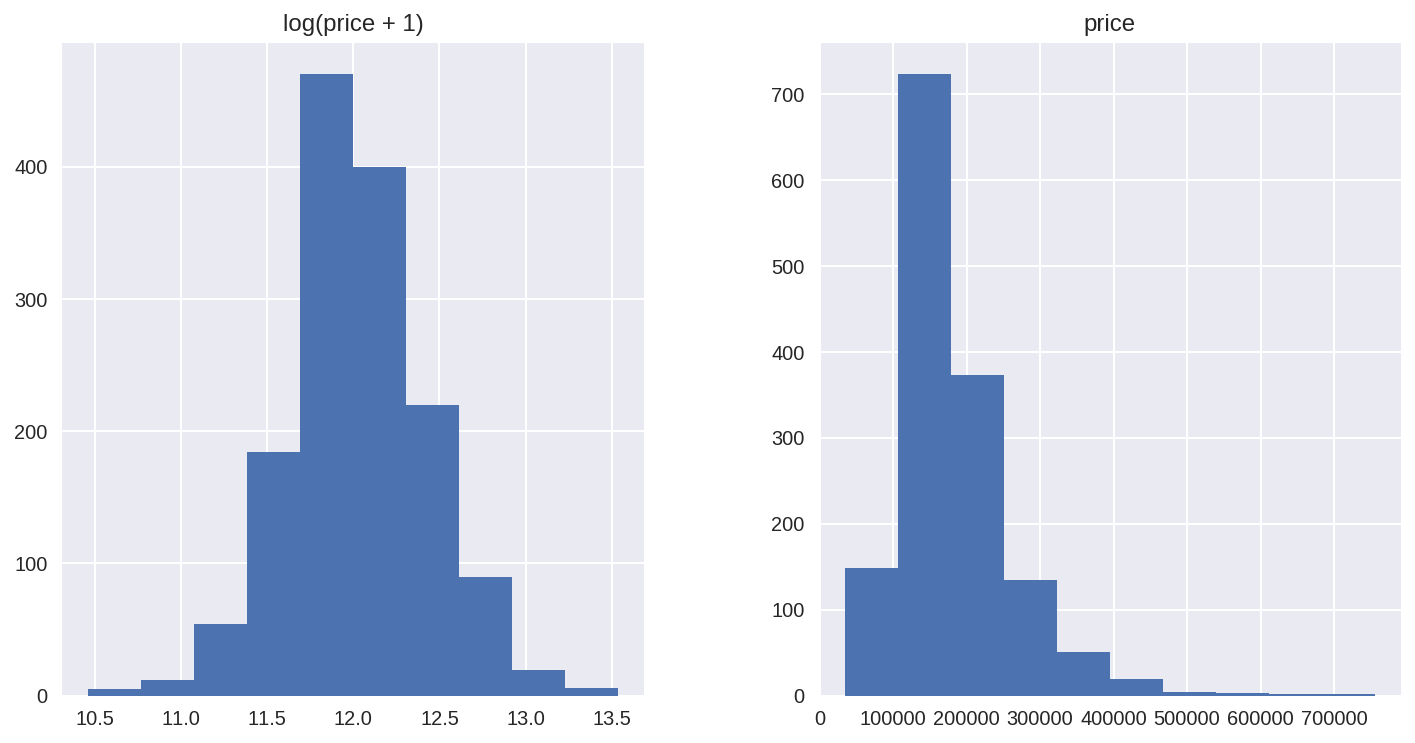

In [33]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [35]:
#log transform the target:
#train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
print(numeric_feats)
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
print(skewed_feats)
skewed_feats = skewed_feats[skewed_feats > 15]
skewed_feats = skewed_feats.index
print(skewed_feats)
print(len(skewed_feats))


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Alley', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
MSSubClass        1.406210
LotFrontage       3.107397
LotArea          12.195142
Alley             4.284964
OverallQual       0.216721
OverallCond       0.692355
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea        2.690610
BsmtFinSF1        1.683771
BsmtFinSF2        4.274943
BsmtUnfSF         1.077654
TotalBsmtSF       1.522688
1stFlrSF          1.375342
2ndFlrSF          0.812194
LowQualFinSF      9.002080
GrLivArea   

In [ ]:
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [7]:
all_data = pd.get_dummies(all_data)


In [8]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [9]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

## Models ##

In [10]:
from sklearn.linear_model import ElasticNet, RidgeCV, LassoCV, LassoLarsCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

**Gradient Boosting Regressor**

In [339]:
#n_estimators = [150, 170 , 200, 400, 500]
#cv_rmse_gb = [rmse_cv(GradientBoostingRegressor(n_estimators = n_estimator)).mean() 
 #           for n_estimator in n_estimators]

In [340]:
#print (cv_rmse_gb)

In [341]:
#cv_gb = pd.Series(cv_rmse_gb , index = n_estimators)
#cv_gb.plot(title = "Validation Gradient Boosting")
#plt.xlabel("n_estimator")
#plt.ylabel("rmse")

In [342]:
#cv_gb.min()

In [343]:
#model_gb = GradientBoostingRegressor(n_estimators = 400).fit(X_train, y)

In [344]:
#let's look at the residuals as well:
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

#preds_gb = pd.DataFrame({"preds Gradient Boost":model_gb.predict(X_train), "true":y})
#preds_gb["residuals"] = preds_gb["true"] - preds_gb["preds Gradient Boost"]
#preds_gb.plot(x = "preds Gradient Boost", y = "residuals",kind = "scatter")

**ElasticNet**

In [398]:
#alphas_en = [0.001, 0.005, 0.1, 0.3]
#cv_rmse_en = [rmse_cv(ElasticNet(alpha = alpha)).mean() 
#          for alpha in alphas_en]

In [399]:
#print (cv_rmse_en)

[0.12289939197911473, 0.13490997678059183, 0.18519149942971563, 0.24479533564442271]


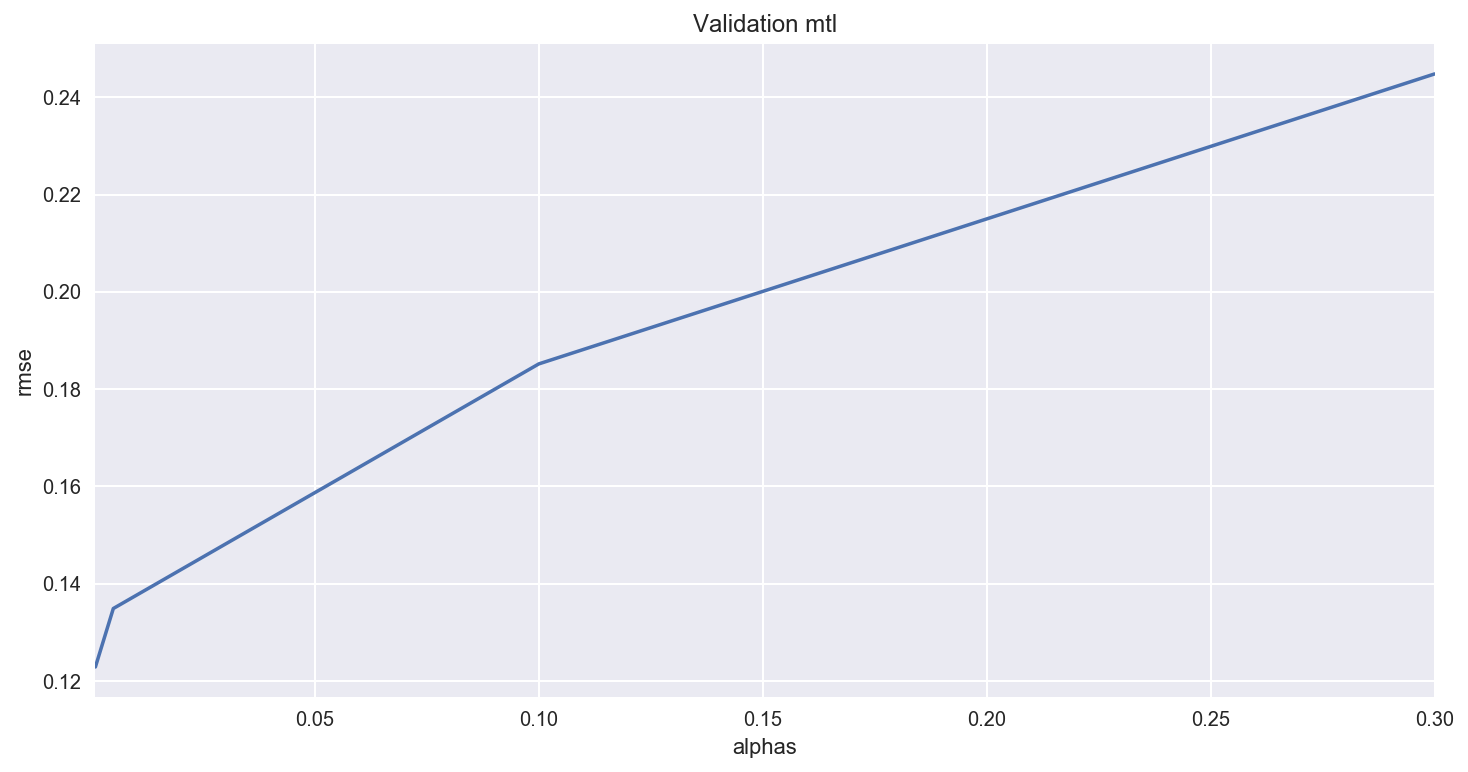

In [400]:
#cv_en = pd.Series(cv_rmse_en, index = alphas_en)
#cv_en.plot(title = "Validation mtl")
#plt.xlabel("alphas")
#plt.ylabel("rmse")

In [401]:
#cv_en.min()

0.12289939197911473

In [402]:
#model_en = ElasticNet(alpha = 0.001).fit(X_train, y)

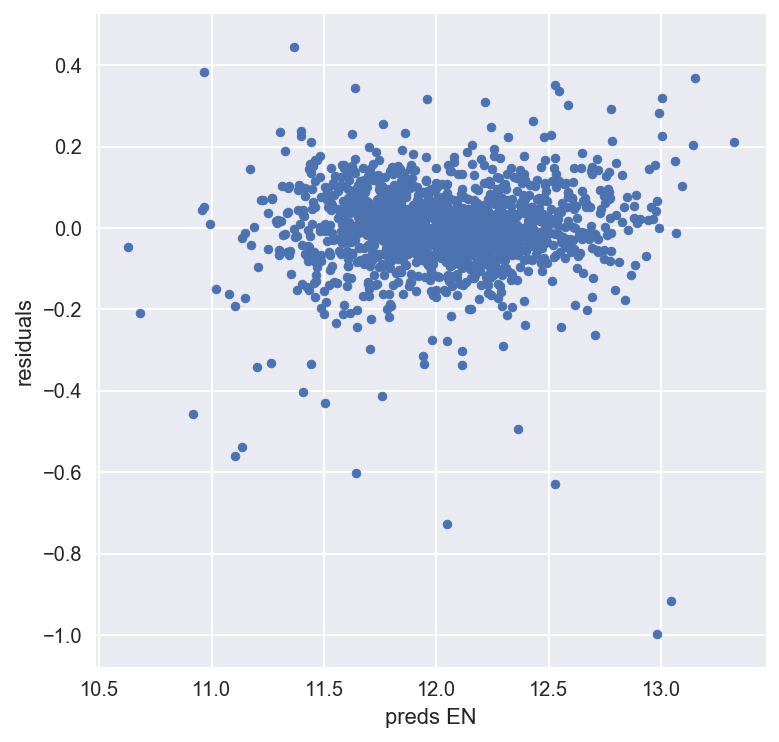

In [403]:
#let's look at the residuals as well:
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

#preds_en = pd.DataFrame({"preds EN":model_en.predict(X_train), "true":y})
#preds_en["residuals"] = preds_en["true"] - preds_en["preds EN"]
#preds_en.plot(x = "preds EN", y = "residuals",kind = "scatter")

**Lasso**

In [433]:
#model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [1]:
#from sklearn.model_selection import GridSearchCV
#clf = model_lasso
#parameters = {'alpha': [1, 0.1, 0.0001, 0.0005,10],
#              'epsilon' : [1.2,1.25,1.50,1.7],
#              'tol' : [1e-10]}
#r2 = make_scorer(r2_score)
#grid_obj = GridSearchCV(clf, parameters, cv=cv,scoring=r2)

#print(rmse_cv(model_lasso))

NameError: name 'model_lasso' is not defined

In [442]:
cv_rmse_lasso = rmse_cv(model_lasso).mean()

In [406]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score


print (cv_rmse_lasso)
mse1 = make_scorer(mean_squared_error)
scores = cross_val_score(model_lasso, X_train, y, cv=5, scoring=mse1)
print(scores)
print(np.mean(scores))

0.12314421091
[ 0.0106729   0.0172852   0.01575637  0.01170481  0.0216752 ]
0.0154188951012


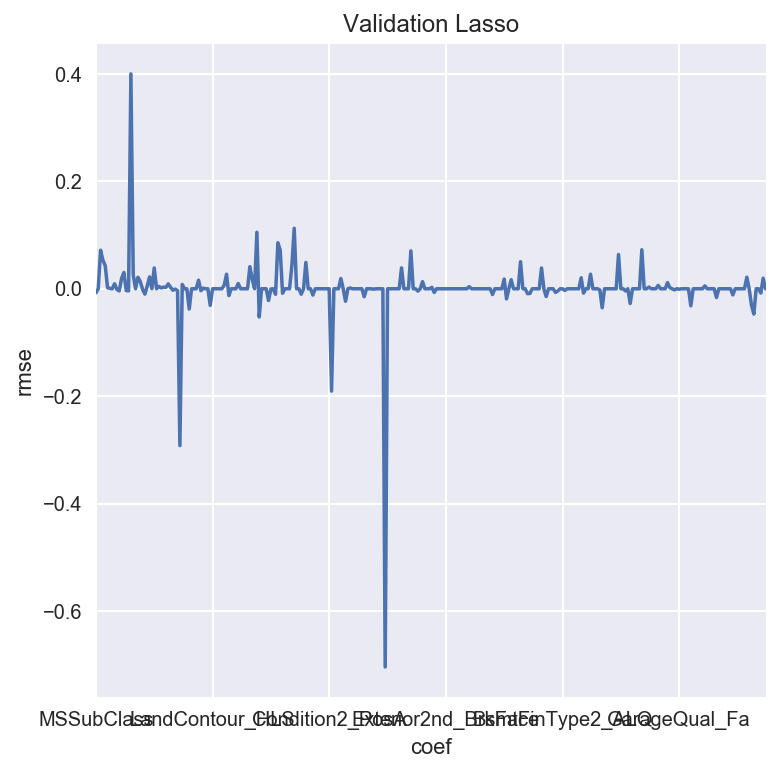

In [407]:
cv_lasso = pd.Series(model_lasso.coef_, index = X_train.columns)
cv_lasso.plot(title = "Validation Lasso")
plt.xlabel("coef")
plt.ylabel("rmse")


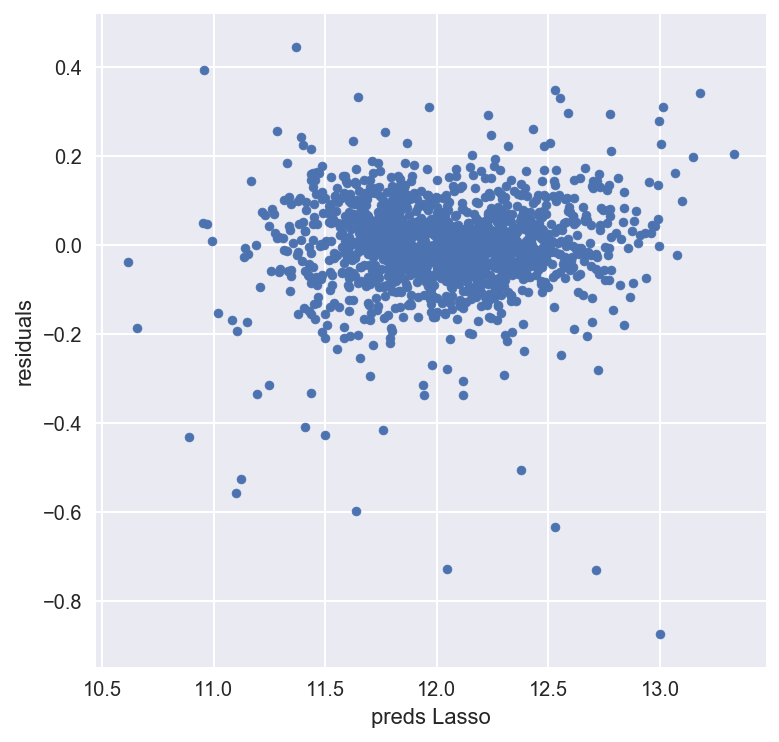

In [408]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds_lasso= pd.DataFrame({"preds Lasso":model_lasso.predict(X_train), "true":y})
preds_lasso["residuals"] = preds_lasso["true"] - preds_lasso["preds Lasso"]
preds_lasso.plot(x = "preds Lasso", y = "residuals",kind = "scatter")

**xgboost model**

In [409]:
#import xgboost as xgb
#dtrain = xgb.DMatrix(X_train, label = y)
#dtest = xgb.DMatrix(X_test)

#params = {"max_depth":6, "eta":0.1}
#model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

In [410]:
#model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [411]:
#model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=6, learning_rate=0.1) #the params were tuned using xgb.cv
#model_xgb.fit(X_train, y)

**Prediction**

In [412]:
#gb_preds = np.expm1(model_gb.predict(X_test))


lasso_preds = np.expm1(model_lasso.predict(X_test))
en_preds = np.expm1(model_en.predict(X_test))
#xgb_preds = np.expm1(model_xgb.predict(X_test))

In [413]:
preds = lasso_preds

In [414]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("lasso_en_last.csv", index = False)

In [ ]:
print('Training on all data: ')
clf = svm.SVR(kernel="linear", C=7,)
clf.fit(train, labels)
predictions = clf.predict(test)

predictions_svm = np.exp(predictions)
sub = pd.DataFrame({
        "Id": ids,
        "SalePrice": predictions_svm
    })
sub.to_csv("prices_svm.csv", index=False)
